In [33]:
import sys
sys.path.insert(1, '..')
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from conn.conn_tf import _tf_decomp
from conn.conn_spec import conn_spec

In [224]:
class TestConnSpec:

    def test_tf_decomp(self, ):
        pass

    def test_wavelet_spec(self, ):
        pass

    def test_conn_spec(self,):
        """Test function conn_spec"""
        n_roi, n_times, n_epochs = 4, 1000, 20
        n_edges = int(n_roi*(n_roi-1)/2)
        sfreq, freqs = 200, np.arange(1, 51, 1)
        n_cycles = freqs/2
        times = np.arange(0, n_times//sfreq, 1/sfreq)
        x = np.sin(2*np.pi*t*30)\
            + np.random.normal(0, 1, size=(n_epochs, n_roi, n_times))

        for method in ['coh', 'plv']:
            # Test coherence
            out = conn_spec(x, sfreq=sfreq, metric=method, freqs=freqs,
                            sm_times=2., sm_kernel='square', n_jobs=1, n_cycles=n_cycles,
                            times=times)
            # Test container attributes, dims and coords
            assert out.name == method
            assert out.sizes["roi"] == n_edges
            assert out.shape == (20, 6, 50, 1000)
            np.testing.assert_array_equal(out.dims, ('trials', 'roi', 'freqs', 'times'))
            att = ['sources', 'targets', 'sfreq', 'sm_times',
                   'sm_freqs', 'sm_kernel', 'mode', 'n_cycles',
                   'mt_bandwidth', 'decim', 'type']
            np.testing.assert_array_equal(list(out.attrs.keys()), att)

            # Compare output with groudtruth
            actual = out.mean(dim=("trials","times")).sel(freqs=slice(28, 32)).mean("freqs")
            np.testing.assert_allclose(actual, [0.80]*n_edges, 0.1)

In [225]:
test = TestConnSpec()

In [226]:
test.test_conn_spec()

WARNING | No regions of interest are provided (roi). Default ones are created
Computing pairwise Coherence (n_pairs=6, n_freqs=50, decim=1, sm_times=400, sm_freqs=1)
100%|██████████| Estimating pairwise Coherence for trials 0...19 : 6/6 [00:00<00:00,   21.48it/s]
WARNING | No regions of interest are provided (roi). Default ones are created
Computing pairwise Phase-Locking Value (n_pairs=6, n_freqs=50, decim=1, sm_times=400, sm_freqs=1)
100%|██████████| Estimating pairwise Phase-Locking Value for trials 0...19 : 6/6 [00:00<00:00,   15.59it/s]


#### Stationary sinusoidal

In [221]:
sfreq = 200.
N = 1000
t = np.arange(0, N//sfreq, 1/sfreq)
n_roi, n_times, n_epochs = 4, 1000, 20
x = np.sin(2*np.pi*t*30)\
    + np.random.normal(0, 1, size=(n_epochs, n_roi, n_times))

In [222]:
freqs = np.arange(1, 50, 1)
metric = 'plv'
n_cycles = freqs/2

In [223]:
data = xr.DataArray(x, dims=("trials", "roi", "times"),
                    coords={"times": t})

In [192]:
out = conn_spec(data, sfreq=sfreq, metric=metric, freqs=freqs,
                sm_times=, sm_kernel='square', n_jobs=1, n_cycles=n_cycles,
                times="times", roi="roi")

Computing pairwise Phase-Locking Value (n_pairs=6, n_freqs=49, decim=1, sm_times=400, sm_freqs=1)
100%|██████████| Estimating pairwise Phase-Locking Value for trials 0...19 : 6/6 [00:00<00:00,   16.34it/s]


In [193]:
actual = out.mean(dim=("trials","times")).sel(freqs=slice(28,32)).mean("freqs")

In [194]:
actual

<xarray.DataArray 'plv' (roi: 6)>
array([0.84514683, 0.8427721 , 0.8448517 , 0.8434332 , 0.8437759 ,
       0.8476068 ], dtype=float32)
Coordinates:
  * roi      (roi) <U3 '0-1' '0-2' '0-3' '1-2' '1-3' '2-3'

In [195]:
np.testing.assert_allclose(actual, [0.80]*6, 0.1)

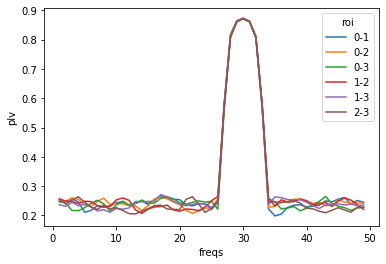

In [160]:
out.mean(dim=("trials","times")).plot(x="freqs", hue="roi");

In [129]:
sfreq = 200.
N = 1000
t = np.arange(0, N//sfreq, 1/sfreq)
x = np.sin(2*np.pi*t*10)*(t<2.5) + np.sin(2*np.pi*t*30)*(t>=2.5)\
    + np.random.normal(0, 1, size=(n_epochs, n_roi, n_times))

data = np.vstack((x,y))

In [130]:
data = xr.DataArray(x, dims=("trials", "roi", "times"),
                    coords={"times": t})

In [131]:
out = conn_spec(data, sfreq=sfreq, metric=metric, freqs=freqs,
                sm_times=0.6, sm_kernel='square', n_jobs=1, n_cycles=n_cycles,
                times="times", roi="roi")

Computing pairwise Phase-Locking Value (n_pairs=6, n_freqs=49, decim=1, sm_times=120, sm_freqs=1)
100%|██████████| Estimating pairwise Phase-Locking Value for trials 0...19 : 6/6 [00:00<00:00,   17.68it/s]


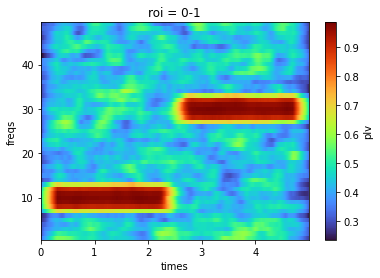

In [132]:
out.mean("trials").isel(roi=0).plot.imshow(x="times", y="freqs", cmap="turbo")

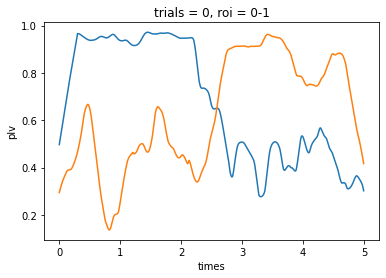

In [133]:
out.sel(freqs=slice(8, 12), roi="0-1", trials=0).mean("freqs").plot(x="times")
out.sel(freqs=slice(28, 33), roi="0-1", trials=0).mean("freqs").plot(x="times")